In [185]:
df = marcap_data('2018-01-01', '2023-02-03', code='005930')

In [186]:
latest_stocks = df.iloc[-1]['Stocks'] # 범위 마지막날 주식수(기준)
df['Adj_Close'] = df['Close'] * (df['Stocks'] / latest_stocks)

In [187]:
from matplotlib import pyplot as plt

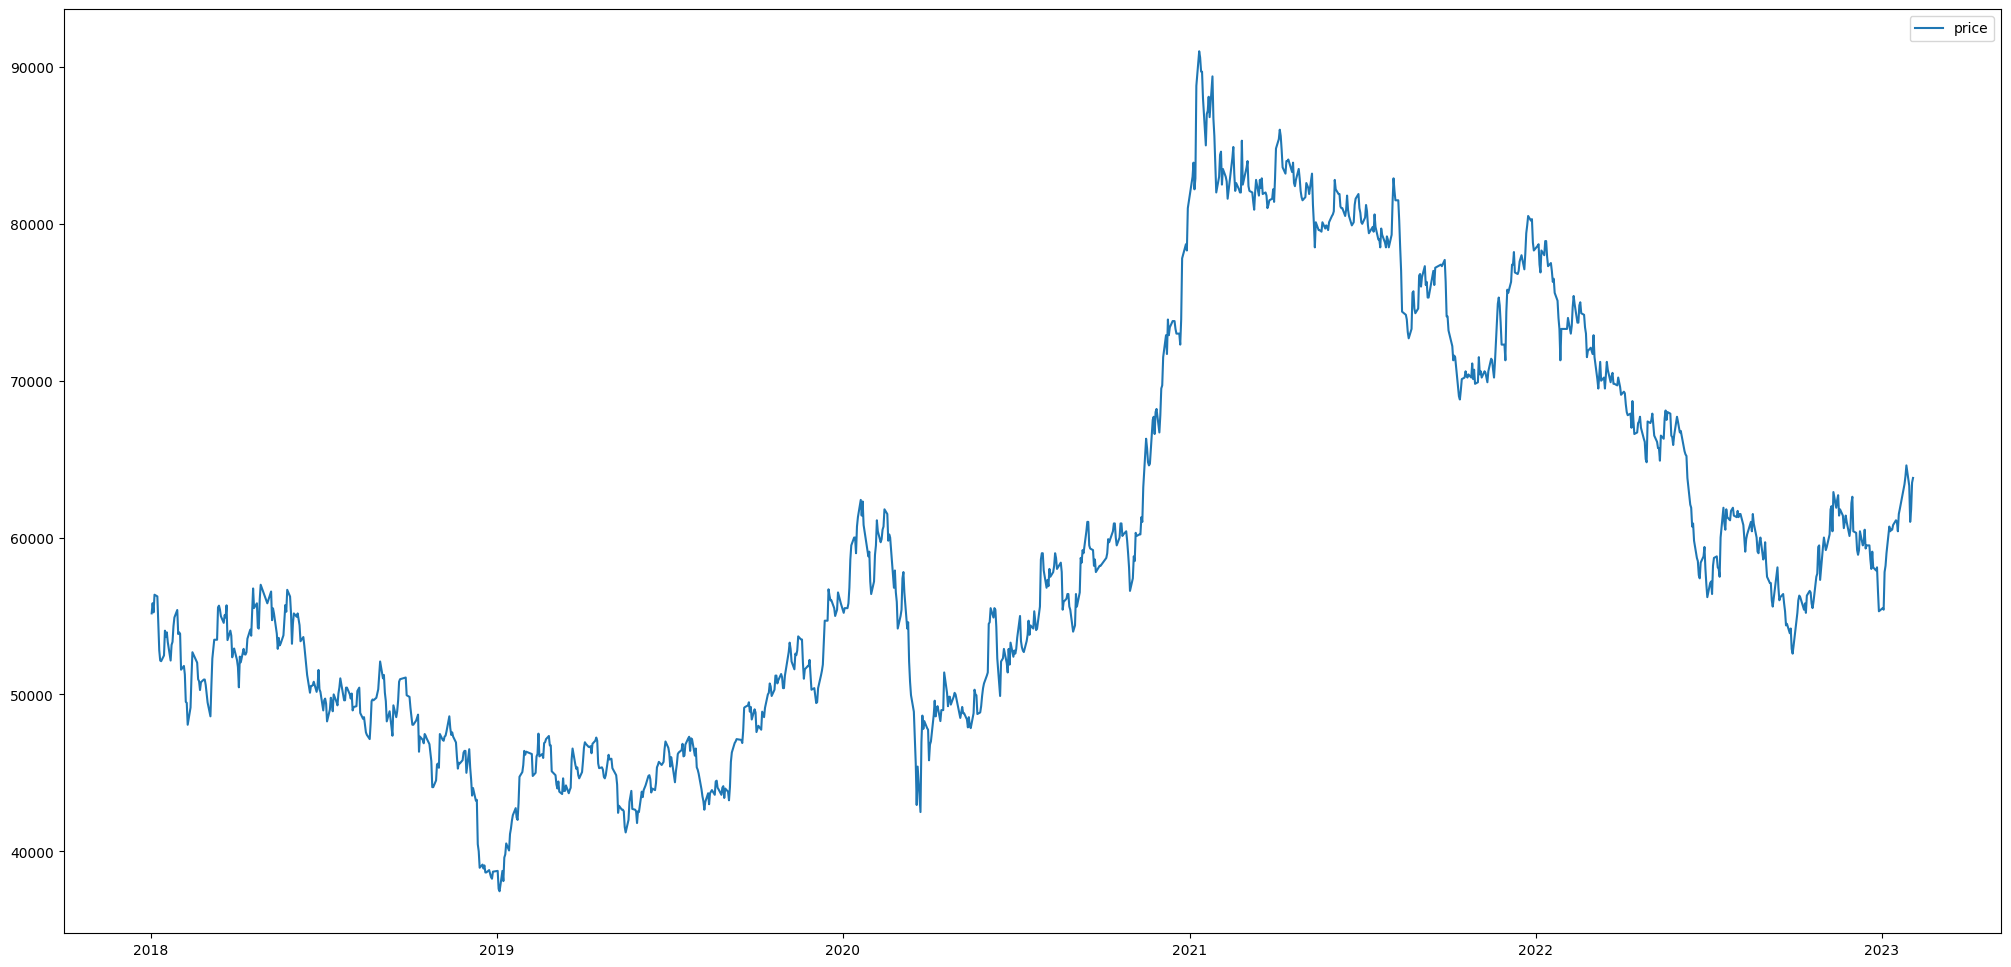

In [188]:
plt.figure(figsize=(25,12))
plt.plot(df['Adj_Close'], label='price')
plt.legend()

In [189]:
df['Rescaled_Vol'] = df['Volume'] / df['Volume'].sum()
df['Rescaled_Close'] = df['Adj_Close'] / df['Adj_Close'].sum()

<module 'matplotlib.pyplot' from '/Users/minsunghong/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

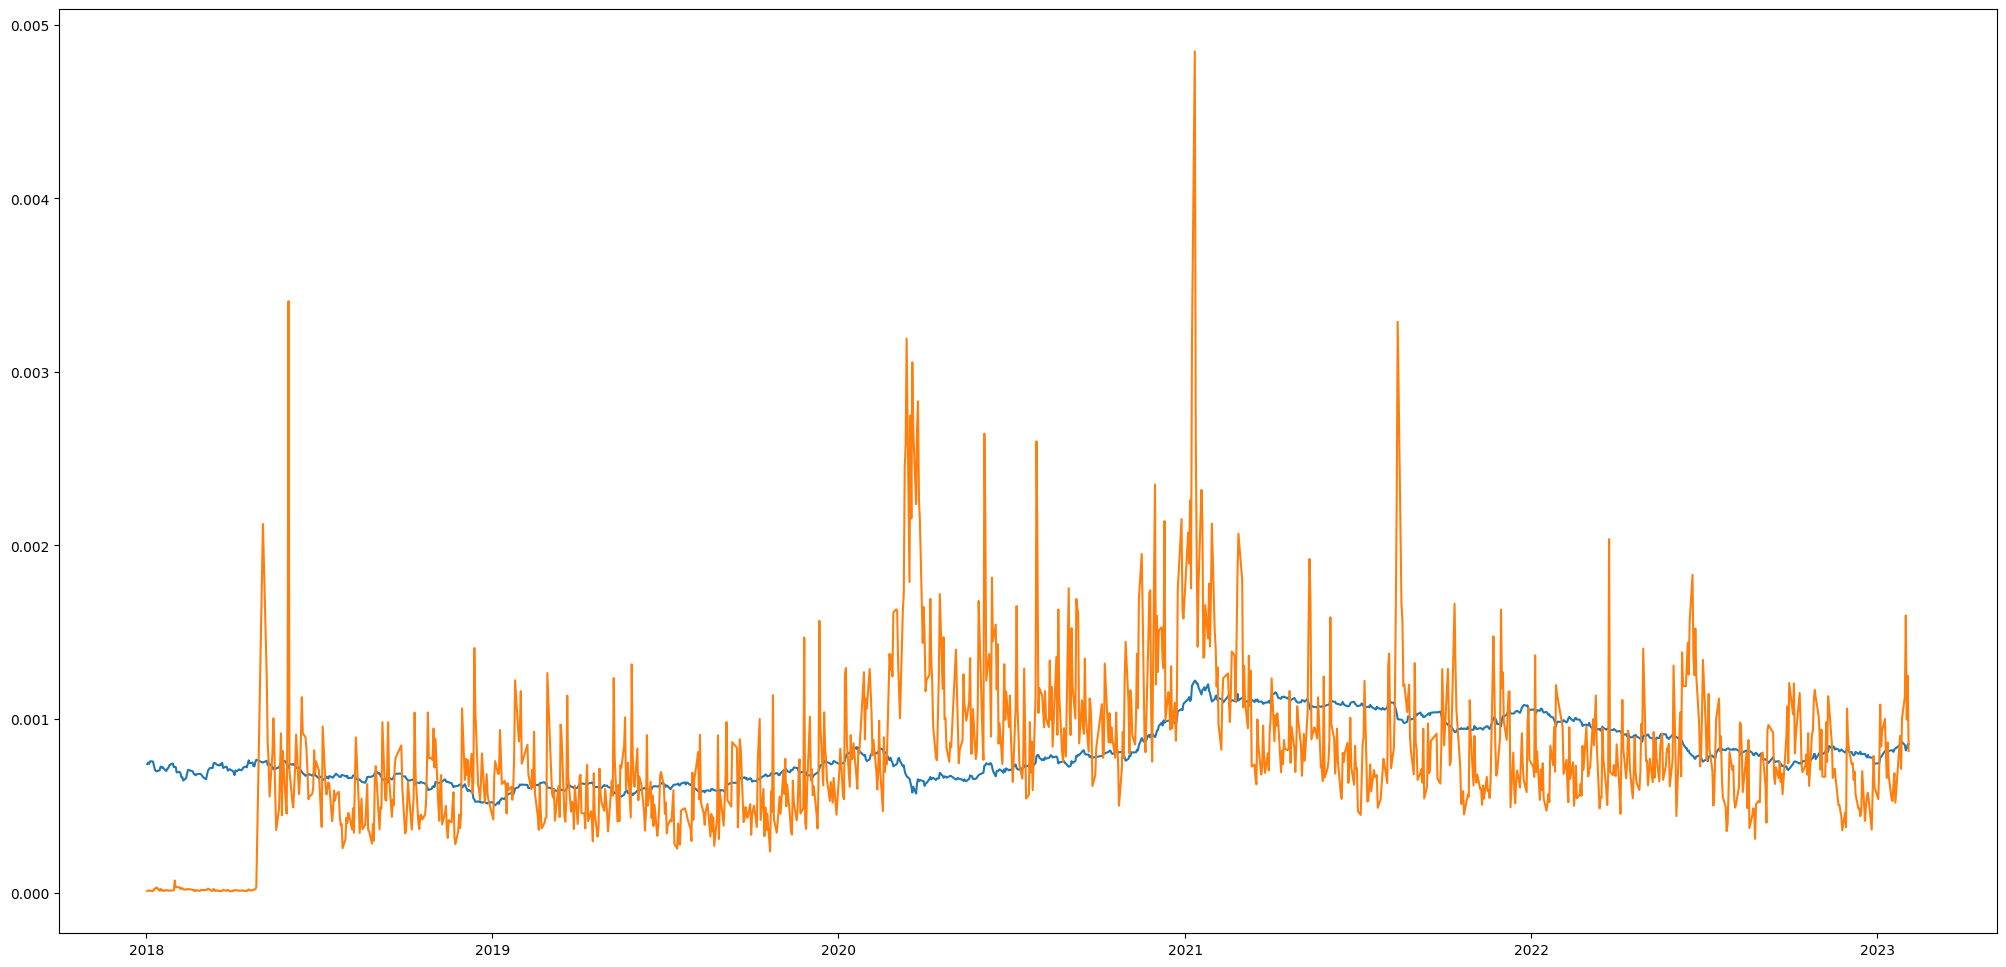

In [190]:
plt.figure(figsize=(25,12))
plt.plot(df['Rescaled_Close'], label='price')
plt.plot(df['Rescaled_Vol'], label='vol')
plt

In [191]:
import numpy as np

In [192]:
def ma(values: list, v=30):
    mas = []
    for i in range(len(values)):
        if v > i:
            mas.append(0)
        else:
            mas.append(np.mean(values[i-v:i]))
    return mas

In [193]:
df['ma_vol'] = ma(df['Volume'], 90)

In [194]:
df['re_ma_vol'] = df['ma_vol'] / df['ma_vol'].sum()

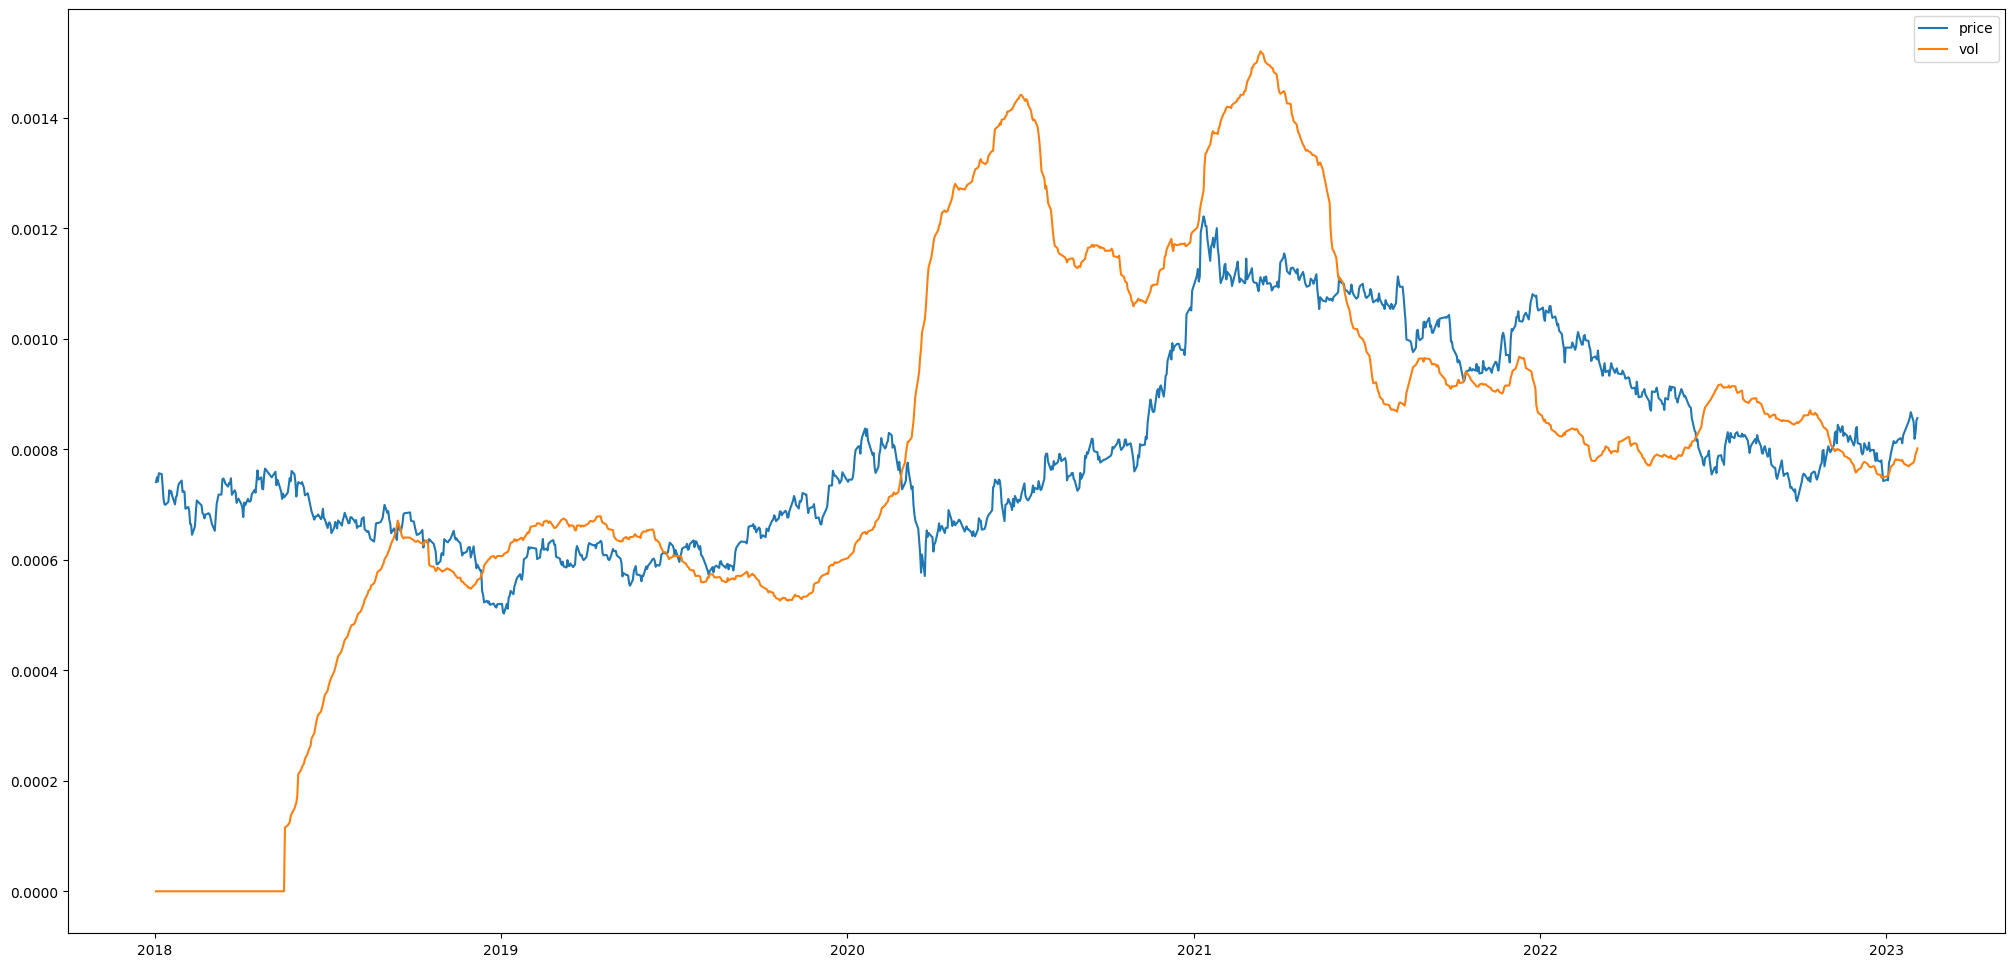

In [195]:
plt.figure(figsize=(25,12))
plt.plot(df['Rescaled_Close'], label='price')
plt.plot(df['re_ma_vol'], label='vol')
plt.legend()

In [199]:
ma_list = [30,60,90,120]
for v in ma_list:
    df[f'ma_{v}'] = ma(df['Adj_Close'], v=v)

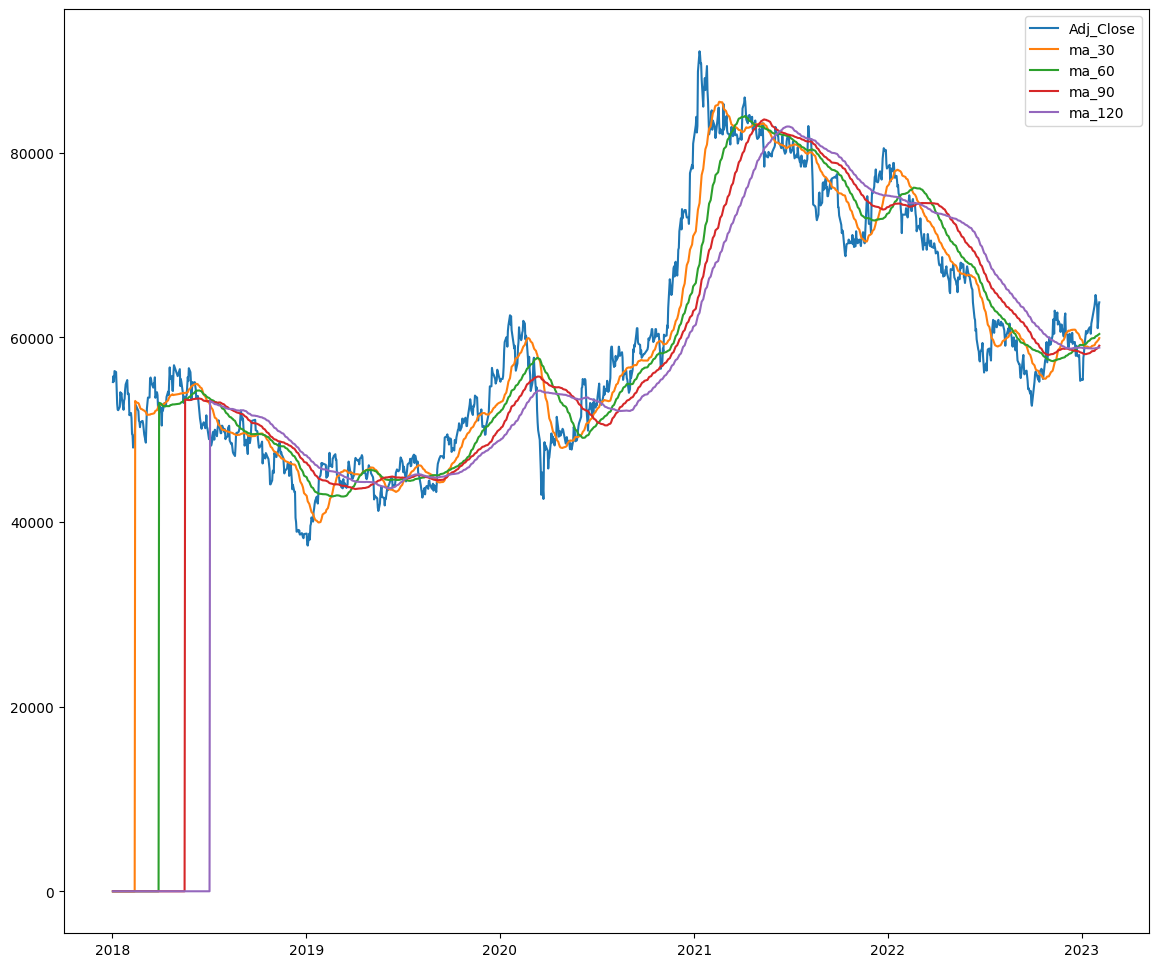

In [200]:
plt.figure(figsize=(14,12))
plt.plot(df['Adj_Close'], label='Adj_Close')
ma_list = [30,60,90,120]
for v in ma_list:
    plt.plot(df[f'ma_{v}'], label=f'ma_{v}')
plt.legend()